## Dataset Description

The dataset titled [Consumer price index: Germany, years, classification of uses of individual consumption](https://www-genesis.destatis.de/genesis//online?operation=table&code=61111-0003&bypass=true&levelindex=0&levelid=1713996336773#abreadcrumb) presents **Consumer Price Index (CPI)** in Germany, spanning from **2019 to 2023**, with the base year being **2020**. Here are the key points:

- **COICOP Hierarchy**: The data is organized according to the Classification of Individual Consumption by Purpose (COICOP) at 2-5-digit levels.
- **Time Frame**: The data spans from 2019 to 2023, allowing for a comparison of price changes over these years.
- **Categories**: It includes a wide range of consumer goods, including food, beverages, tobacco, clothing, footwear etc.

This dataset serves as a valuable resource for economists, researchers, and policy makers interested in analyzing inflation trends and consumption behaviors in Germany.

## Classification of Individual Consumption According to Purpose (COICOP)

The **Classification of Individual Consumption According to Purpose (COICOP)** is a reference classification published by the United Nations Statistics Division. It's used to classify and analyze individual consumption expenditures incurred by households, non-profit institutions serving households, and general government.

### COICOP Hierarchy

The COICOP hierarchy is structured into four levels:

1. **Divisions (two-digit)**: These are broad categories like food and non-alcoholic beverages, clothing and footwear, housing, etc.
2. **Groups (three-digit)**: These are subcategories within each division. For example, under the division of food and non-alcoholic beverages, there could be groups like food, non-alcoholic beverages, etc.
3. **Classes (four-digit)**: These are further subdivisions within each group.
4. **Subclasses (five-digit)**: These are the most specific categories within each class.

Each level provides more detailed information about the consumption expenditures. 


> ### Loading necessary libraries and data

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import re

# Load the data
df = pd.read_csv('../data/61111-0003_F.csv', sep=';', encoding='ISO-8859-1', skiprows=7,names=['consumption_code', 'consumption_label', '2019', '2020', '2021', '2022', '2023'])

In [35]:
df.head()

,consumption_code,consumption_label,2019,2020,2021,2022,2023
0,CC13-01,Food and non-alcoholic beverages,97.9,100.0,103.1,116.0,130.3
1,CC13-011,Food,97.8,100.0,103.1,116.9,131.4
2,CC13-0111,Bread and cereals,99.2,100.0,103.3,116.8,135.9
3,CC13-01111,"Rice, including rice preparations",98.7,100.0,102.6,115.7,135.5
4,CC13-01112,Flour and other cereals,100.2,100.0,104.1,134.2,157.6


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   consumption_code   444 non-null    object
 1   consumption_label  441 non-null    object
 2   2019               441 non-null    object
 3   2020               441 non-null    object
 4   2021               441 non-null    object
 5   2022               441 non-null    object
 6   2023               441 non-null    object
dtypes: object(7)
memory usage: 24.4+ KB


> ### 1. How have food prices evolved over the last five years?

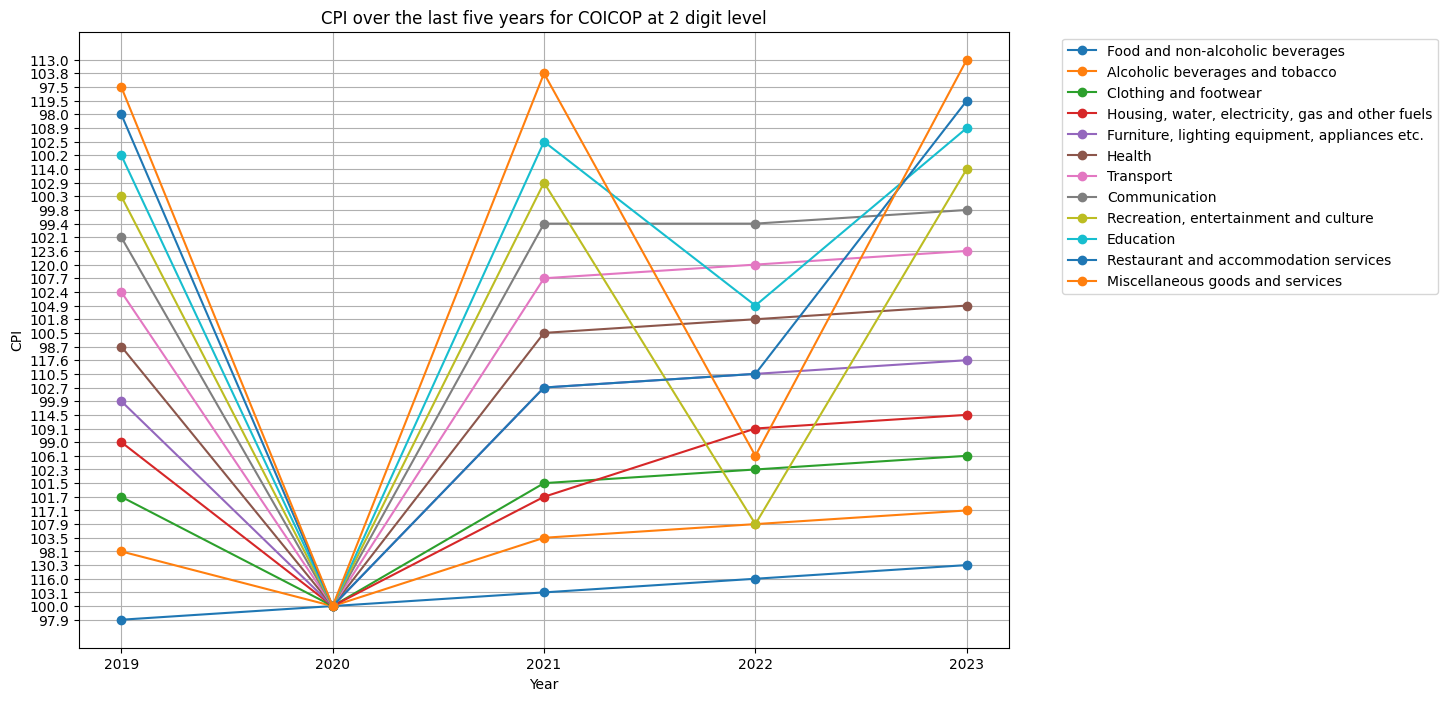

In [37]:
# Replace '-' with 0.0
df = df.replace('-', 0.0)
# Replace '.' with 0.0
df = df.replace('.', 0.0)

# Filter rows where 'consumption_code' has 3 digits after '-'
df_filtered = df[df['consumption_code'].apply(lambda x: bool(re.search('-\d{2}$', x)))]

# Melt the DataFrame to make it suitable for plotting
df_melted = df_filtered.melt(id_vars=['consumption_code', 'consumption_label'], var_name='Year', value_name='CPI')

# Plotting
plt.figure(figsize=(12, 8))
for label in df_melted['consumption_label'].unique():
    data = df_melted[df_melted['consumption_label'] == label]
    plt.plot(data['Year'], data['CPI'], marker='o', label=label)

plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI over the last five years for COICOP at 2 digit level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



>## 2. For which product (or group of products) CPI has been stable for the last five years?

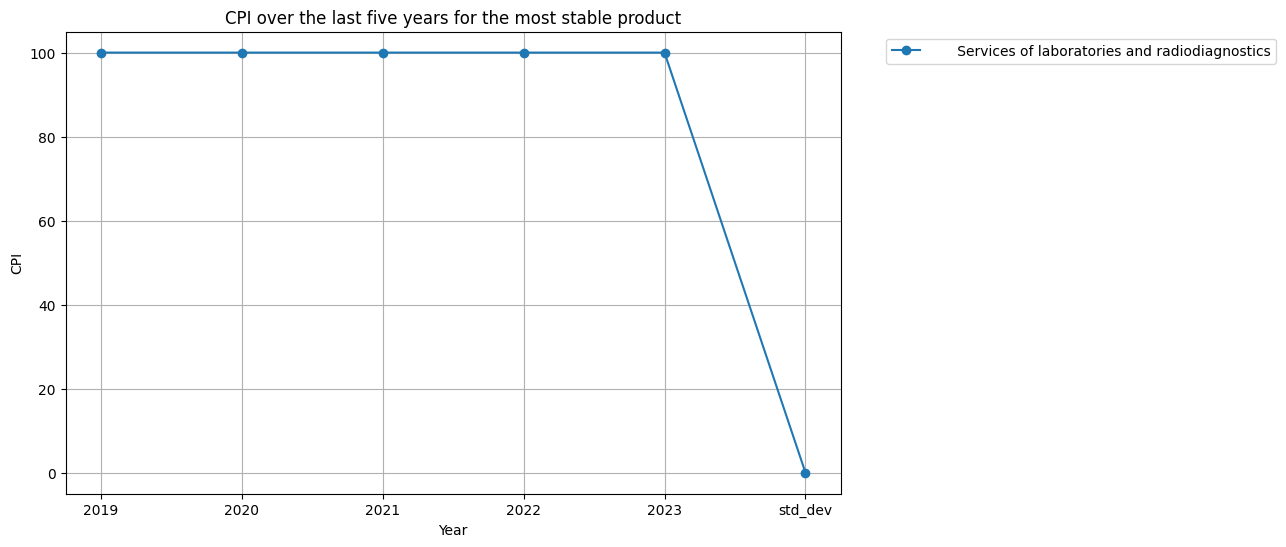

In [41]:
# Convert columns to numeric
for col in ['2019', '2020', '2021', '2022', '2023']:
    df[col] = pd.to_numeric(df[col])
# Calculate the standard deviation of the CPI for each product over the years
df['std_dev'] = df[['2019', '2020', '2021', '2022', '2023']].std(axis=1)

# Sort by standard deviation and take the product with the lowest standard deviation
df_sorted = df.sort_values(by='std_dev', ascending=True).head(1)

# Melt the DataFrame to make it suitable for plotting
df_melted = df_sorted.melt(id_vars=['consumption_code', 'consumption_label'], var_name='Year', value_name='CPI')

# Plotting
plt.figure(figsize=(10, 6))
for label in df_melted['consumption_label'].unique():
    data = df_melted[df_melted['consumption_label'] == label]
    plt.plot(data['Year'], data['CPI'], marker='o', label=label)

plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI over the last five years for the most stable product')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


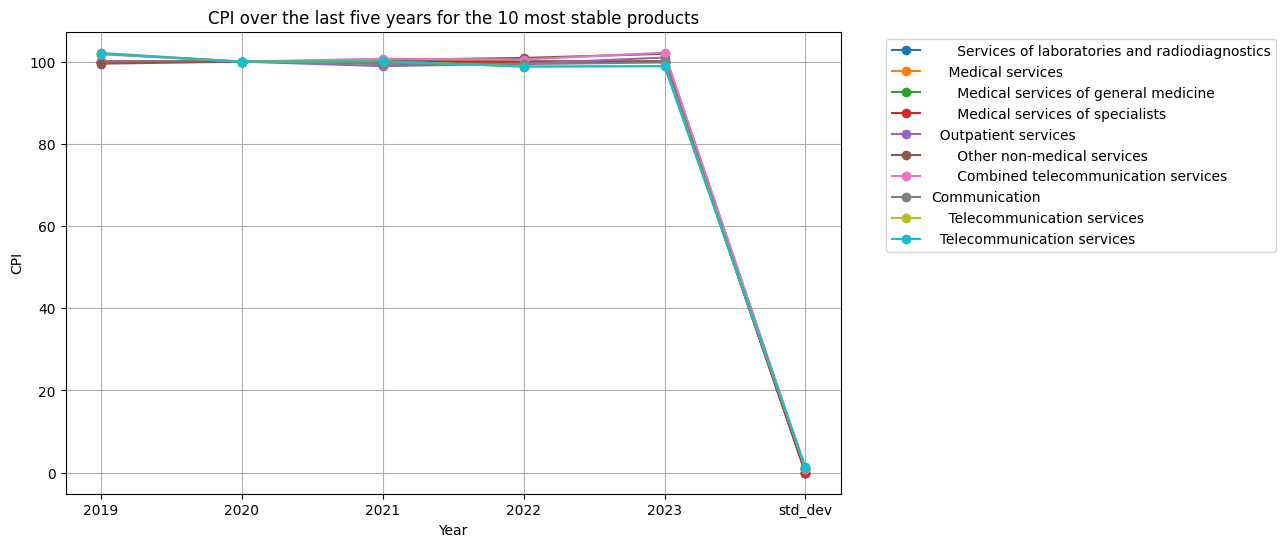

In [57]:
# Sort by standard deviation and take the products with the 10 lowest standard deviations
df_sorted = df.sort_values(by='std_dev', ascending=True).head(10)

# Melt the DataFrame to make it suitable for plotting
df_melted = df_sorted.melt(id_vars=['consumption_code', 'consumption_label'], var_name='Year', value_name='CPI')

# Plotting
plt.figure(figsize=(10, 6))
for label in df_melted['consumption_label'].unique():
    data = df_melted[df_melted['consumption_label'] == label]
    plt.plot(data['Year'], data['CPI'], marker='o', label=label)

plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI over the last five years for the 10 most stable products')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [62]:
# Convert columns to numeric
for col in ['2019', '2020', '2021', '2022', '2023']:
    df[col] = pd.to_numeric(df[col])
# Calculate the standard deviation of the CPI for each product over the years
df['std_dev'] = df[['2019', '2020', '2021', '2022', '2023']].std(axis=1)

# Sort by standard deviation and take the product with the lowest standard deviation
df_sorted = df.sort_values(by='std_dev', ascending=True).head(10)
df_sorted

,consumption_code,consumption_label,2019,2020,2021,2022,2023,std_dev
231,CC13-06231,Services of laboratories and radiodiagno...,100.0,100.0,100.0,100.0,100.0,0.000000
225,CC13-0621,Medical services,100.0,100.0,100.0,100.0,100.0,0.000000
226,CC13-06211,Medical services of general medicine,100.0,100.0,100.0,100.0,100.0,0.000000
227,CC13-06212,Medical services of specialists,100.0,100.0,100.0,100.0,100.0,0.000000
224,CC13-062,Outpatient services,100.0,100.0,98.9,99.5,101.0,0.772658
233,CC13-06239,Other non-medical services,99.5,100.0,100.4,100.9,101.9,0.918150
294,CC13-08304,Combined telecommunication services,101.8,100.0,100.7,100.5,102.2,0.923580
278,CC13-08,Communication,102.1,100.0,99.4,99.4,99.8,1.126055
290,CC13-0830,Telecommunication services,101.9,100.0,100.1,98.8,98.9,1.250200
289,CC13-083,Telecommunication services,101.9,100.0,100.1,98.8,98.9,1.250200
